# Intro
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. <br>
https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Let's look at our data
df = pd.read_csv('data/bank-classification.csv')
df.head()

,id,birth_date,job,marital,education,default,housing,loan,contact_date,contact,campaign,pdays,previous,poutcome,y
0,1,1952-03-23,housemaid,married,basic.4y,no,no,no,2008-05-12,telephone,1,999,0,nonexistent,no
1,2,1951-03-24,services,married,high.school,unknown,no,no,2008-05-26,telephone,1,999,0,nonexistent,unknown
2,3,1971-05-19,services,married,high.school,no,yes,no,2008-05-05,telephone,1,999,0,nonexistent,no
3,4,1968-01-24,admin.,married,basic.6y,no,no,no,2008-05-19,telephone,1,999,0,nonexistent,unknown
4,5,1952-05-11,services,married,high.school,no,no,yes,2008-05-19,telephone,1,999,0,nonexistent,unknown


### contact_date
After analysing the data I have decided to split contact_date into the contact_year, contact_month and contact_day_of_week which brings more information.

In [26]:
df['contact_year'] = pd.DatetimeIndex(df['contact_date']).year
df['contact_month'] = pd.DatetimeIndex(df['contact_date']).month
df['contact_day_of_week'] = pd.DatetimeIndex(df['contact_date']).dayofweek
df = df.drop(['contact_date'], axis=1)

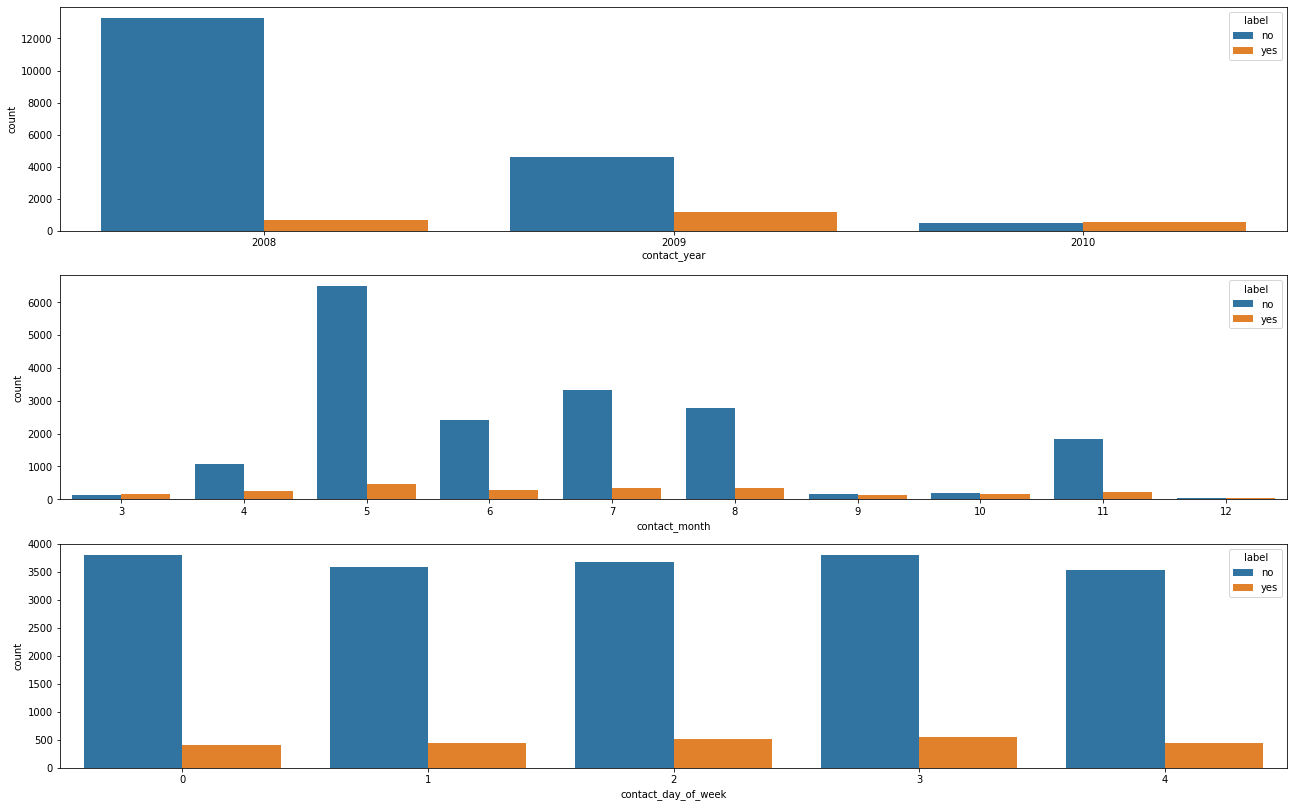

In [27]:
fig, axis = plt.subplots(3, 1, figsize=(22, 14))

p = sns.countplot(x='contact_year', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[0])
p.get_legend().set_title('label')

p = sns.countplot(x='contact_month', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('label')

p = sns.countplot(x='contact_day_of_week', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[2])
p.get_legend().set_title('label')

### brirth_date
I've decided to map birth_date into age (numeric)

In [28]:
# Mapping birth_date into age
age = (pd.to_datetime('2010-11-01') - pd.to_datetime(df['birth_date'])).astype('<m8[Y]').astype(int)
df['age'] = age
df = df.drop('birth_date', axis=1)

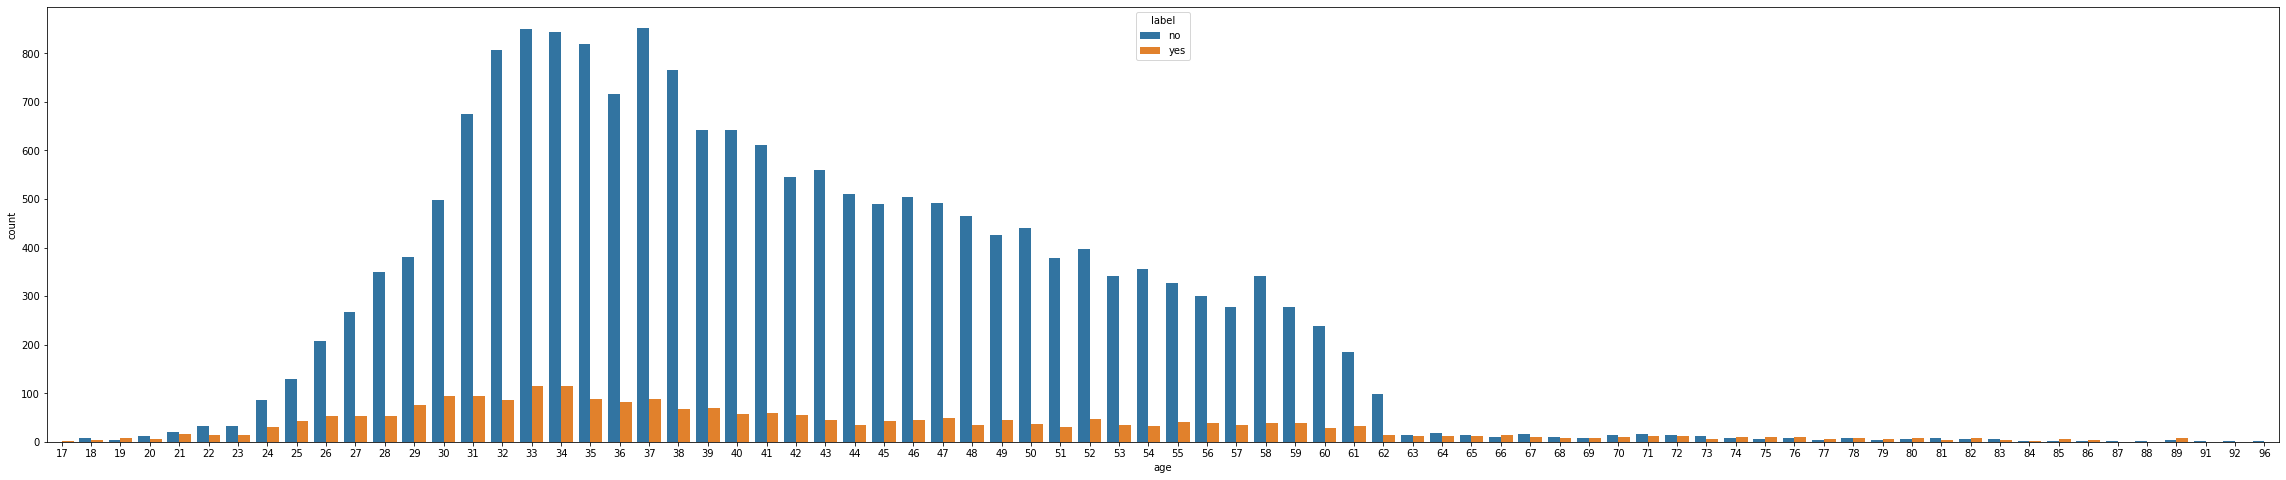

In [29]:
fig, axis = plt.subplots(1, 1, figsize=(40, 8))

p = sns.countplot(x='age', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis)
p.get_legend().set_title('label')

### job
job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

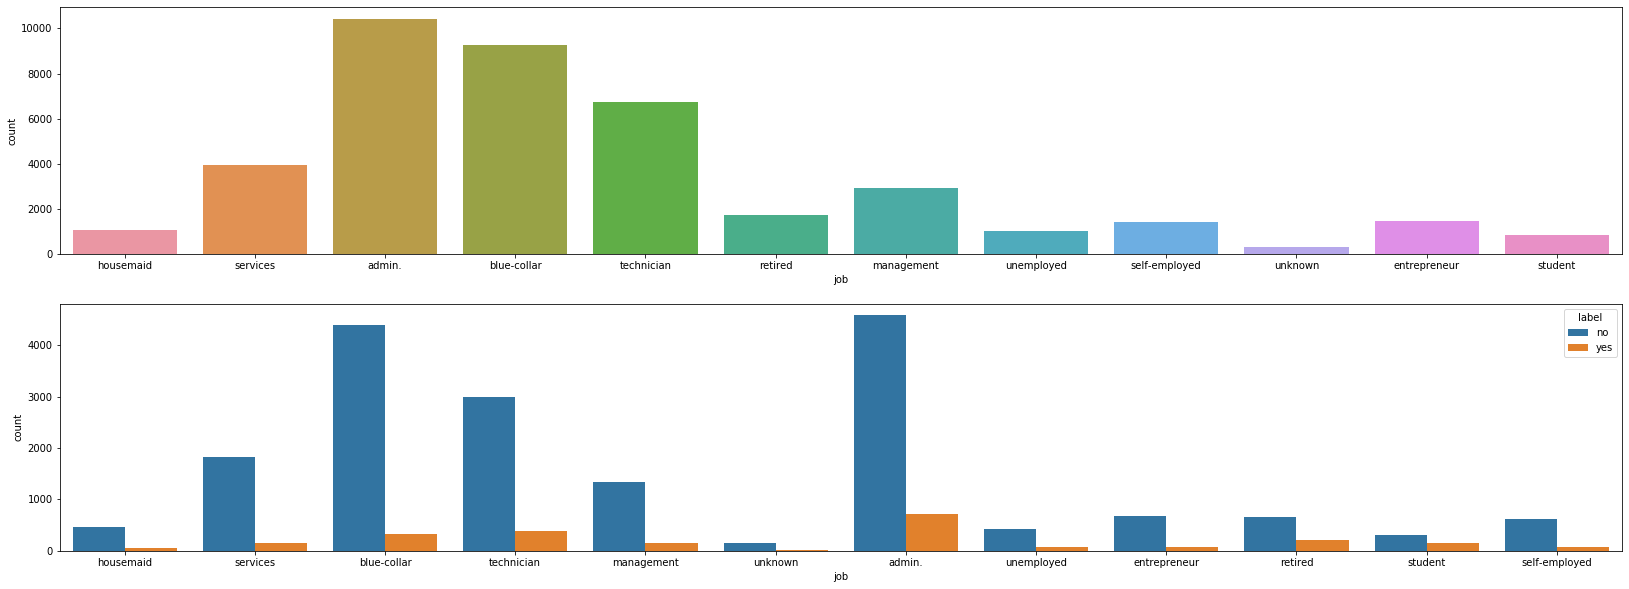

In [30]:
fig, axis = plt.subplots(2, 1, figsize=(28, 10))
sns.countplot(x='job', data=df, ax=axis[0])
p = sns.countplot(x='job', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('label')

### Marital
marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)

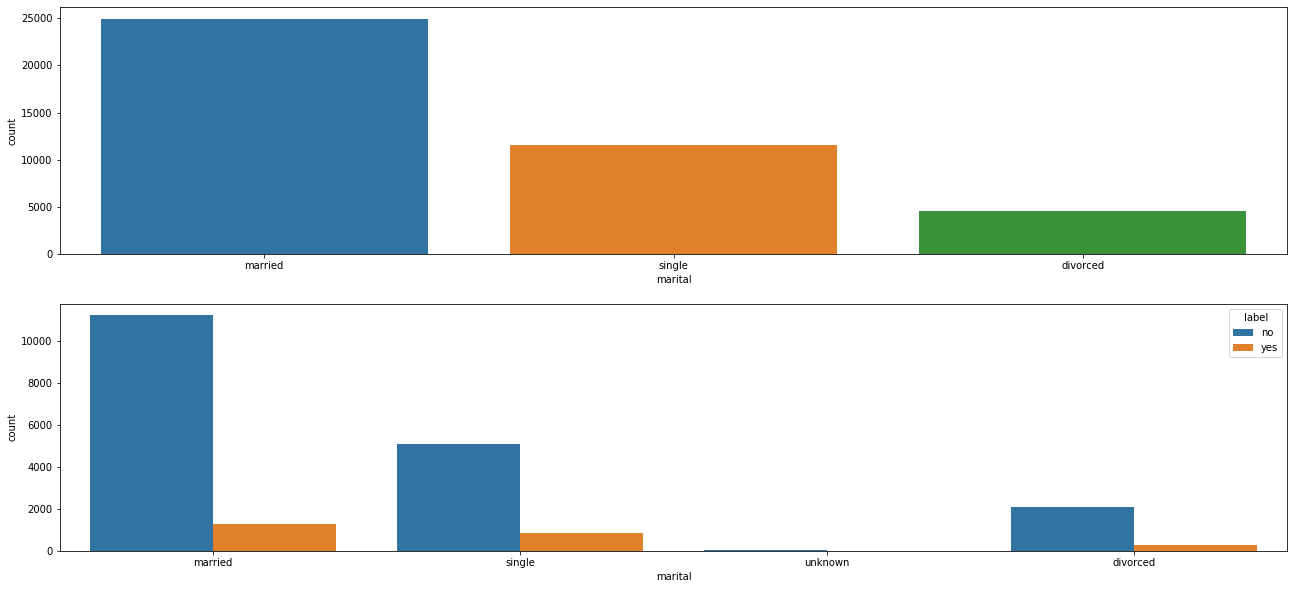

In [31]:
fig, axis = plt.subplots(2, 1, figsize=(22, 10))
sns.countplot(x='marital', data=df.loc[df['marital'] != 'unknown'], ax=axis[0])
p = sns.countplot(x='marital', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('label')

### Education
education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

'education' values summary:
university.degree      6192
high.school            4781
basic.9y               3016
professional.course    2592
basic.4y               2154
basic.6y               1170
unknown                 887
illiterate                7
Name: education, dtype: int64


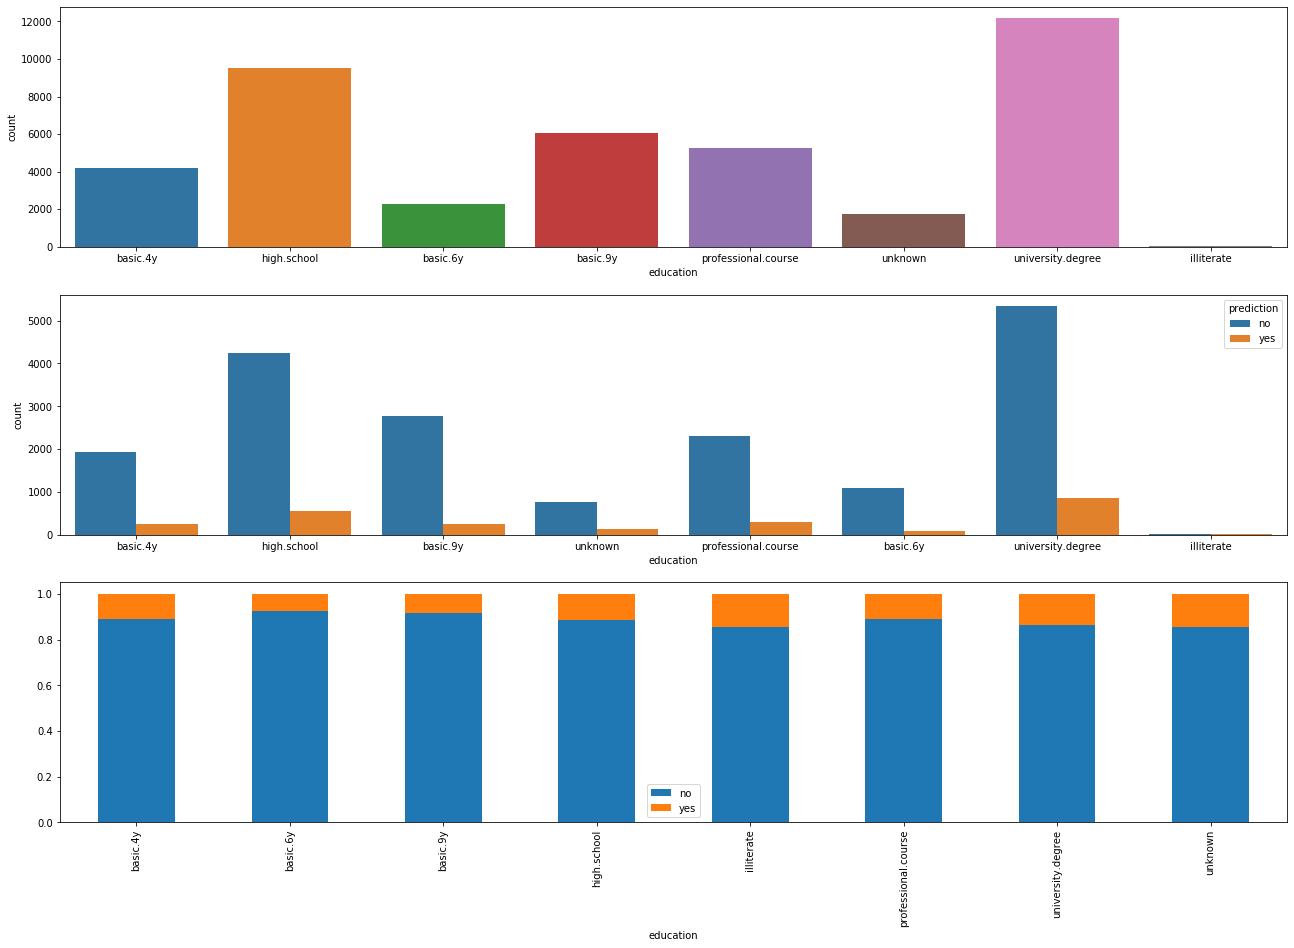

In [32]:
fig, axis = plt.subplots(3, 1, figsize=(22, 15))
sns.countplot(x='education', data=df, ax=axis[0])
p = sns.countplot(x='education', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('prediction')

tmp = df.loc[df['y'] != 'unknown'].groupby('education')['y'].value_counts(normalize=True).unstack()
tmp.plot(kind='bar', stacked='True', ax=axis[2])
axis[2].legend(['no', 'yes'], loc='best')

print("'education' values summary:")
print(df.loc[df['y'] != 'unknown']['education'].value_counts())

### default
default: has credit in default? (categorical: 'no', 'yes', 'unknown') <br>
Observation: In our data default=='yes' -> y='no'

'default' values summary:
no         16408
unknown     4389
yes            2
Name: default, dtype: int64


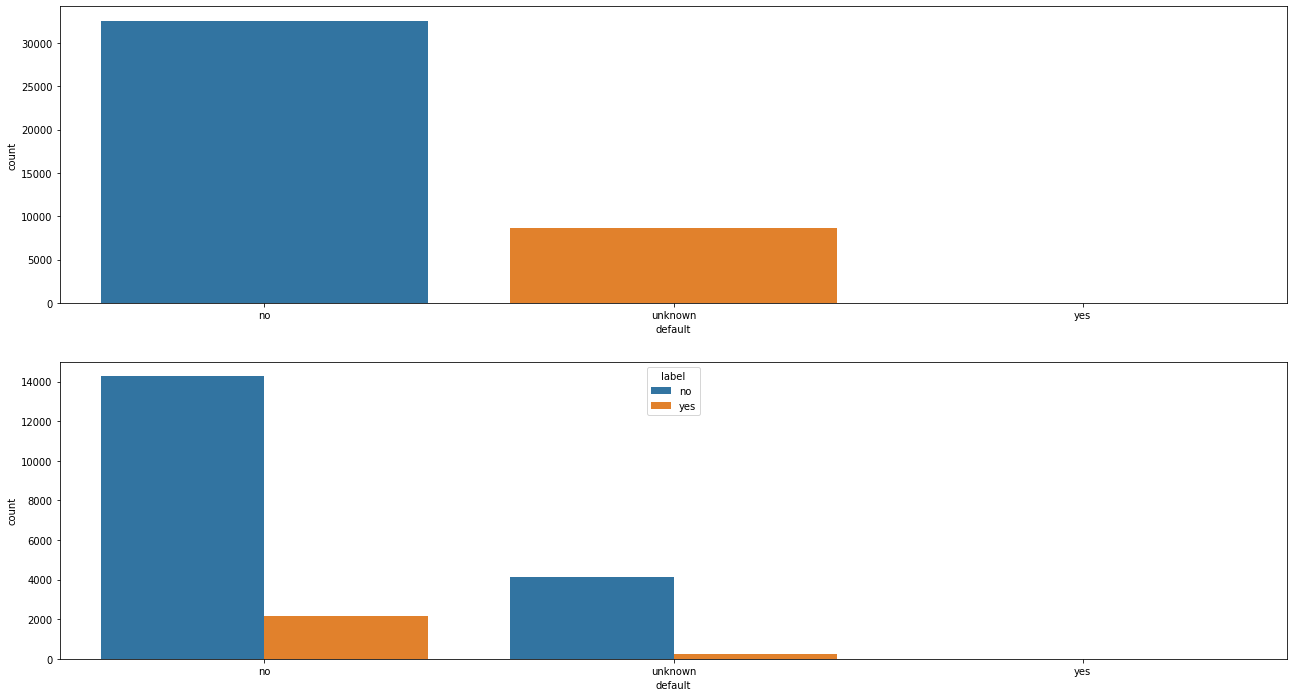

In [33]:
fig, axis = plt.subplots(2 ,1, figsize=(22, 12))
sns.countplot(x='default', data=df, ax=axis[0])
p = sns.countplot(x='default', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('label')

print("'default' values summary:")
print(df.loc[df['y'] != 'unknown']['default'].value_counts())

### housing
housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

'housing' values summary:


yes        10923
no          9386
unknown      490
Name: housing, dtype: int64

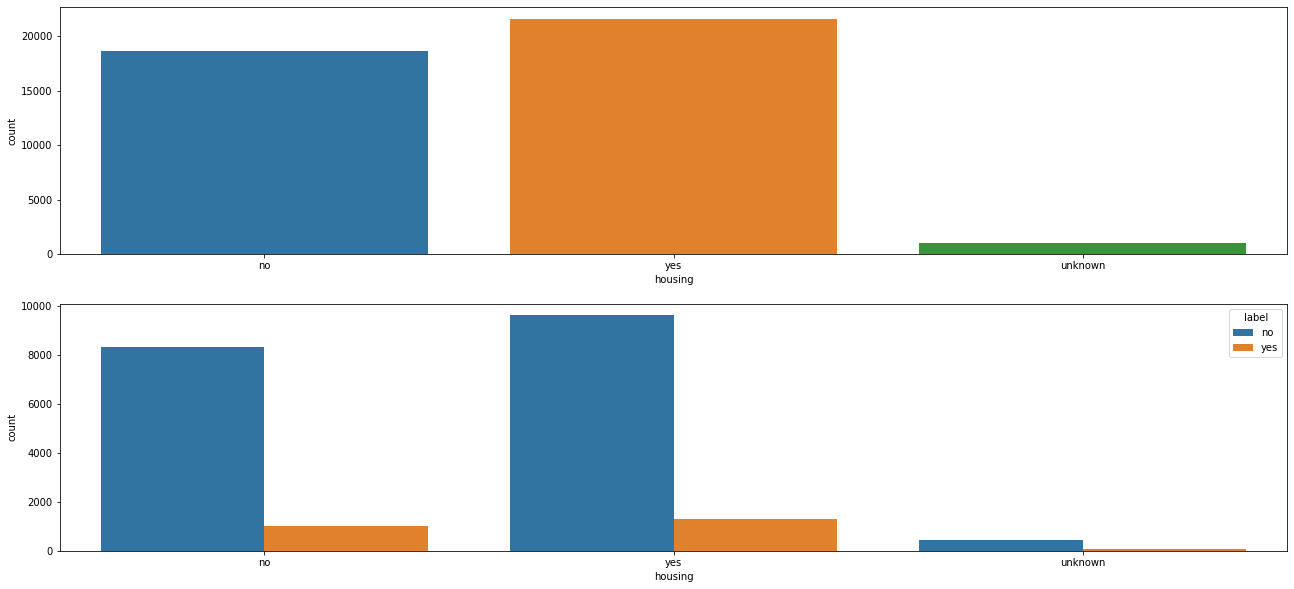

In [34]:
fig, axis = plt.subplots(2, 1, figsize=(22, 10))
sns.countplot(x='housing', data=df, ax=axis[0])
p = sns.countplot(x='housing', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('label')

print("'housing' values summary:")
df.loc[df['y'] != 'unknown']['housing'].value_counts()

### loan
loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

'loan' values summary:


no         17122
yes         3187
unknown      490
Name: loan, dtype: int64

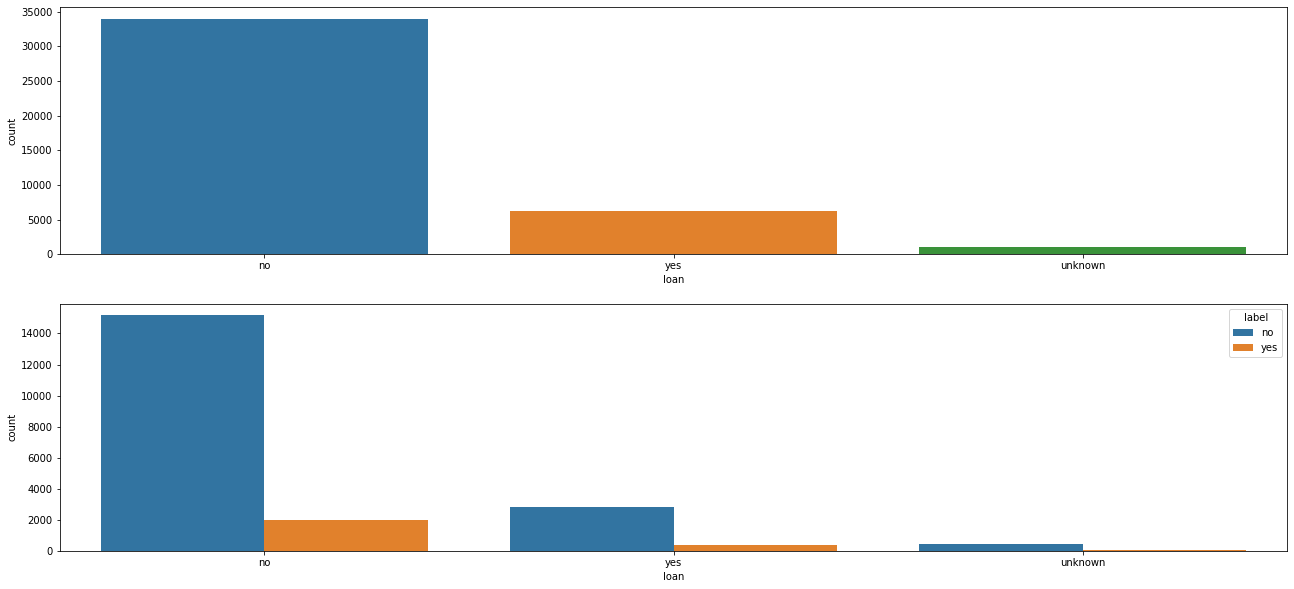

In [35]:
fig, axis = plt.subplots(2, 1, figsize=(22, 10))
sns.countplot(x='loan', data=df, ax=axis[0])
p = sns.countplot(x='loan', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('label')

print("'loan' values summary:")
df.loc[df['y'] != 'unknown']['loan'].value_counts()

### contact
contact: contact communication type (categorical: 'cellular','telephone') 

'contact' values summary:


cellular     13212
telephone     7587
Name: contact, dtype: int64

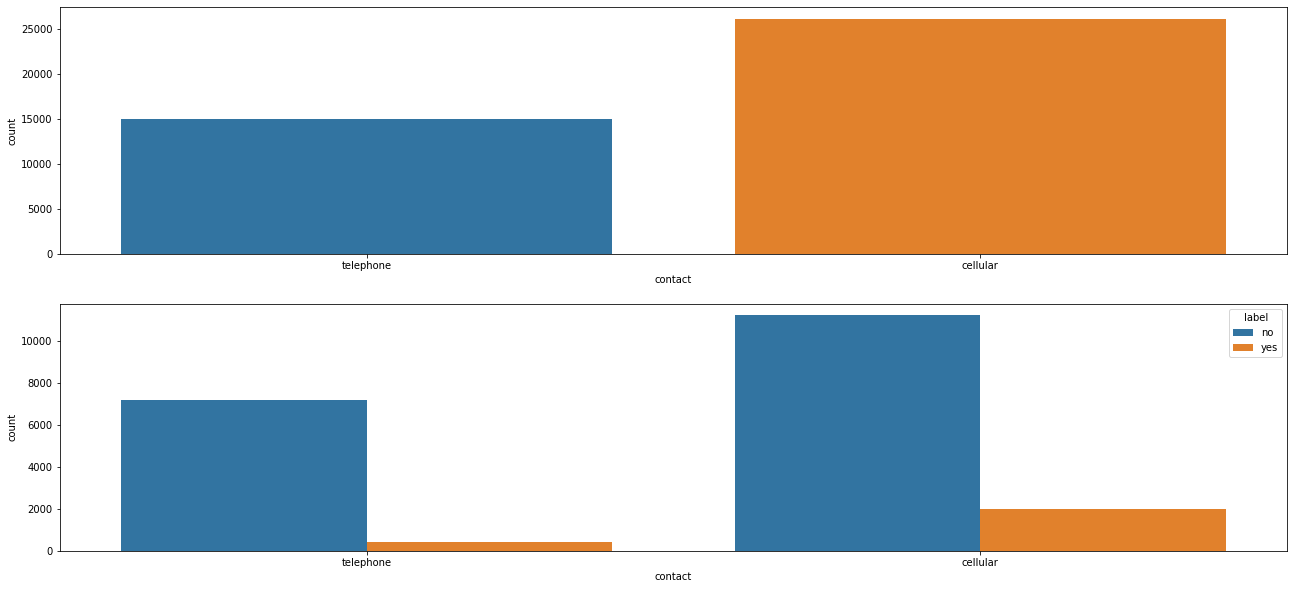

In [36]:
fig, axis = plt.subplots(2, 1, figsize=(22, 10))
sns.countplot(x='contact', data=df, ax=axis[0])
p = sns.countplot(x='contact', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('label')

print("'contact' values summary:")
df.loc[df['y'] != 'unknown']['contact'].value_counts()

### campaign
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

campaign' values summary:


1     8864
2     5340
3     2711
4     1354
5      786
6      480
7      332
8      222
9      150
10     111
11      81
12      69
13      55
14      34
16      33
17      29
15      24
19      17
18      15
20      14
21      10
22      10
24      10
23      10
29       6
27       5
26       5
32       3
28       3
30       3
25       3
43       2
35       2
33       1
31       1
34       1
40       1
41       1
39       1
Name: campaign, dtype: int64

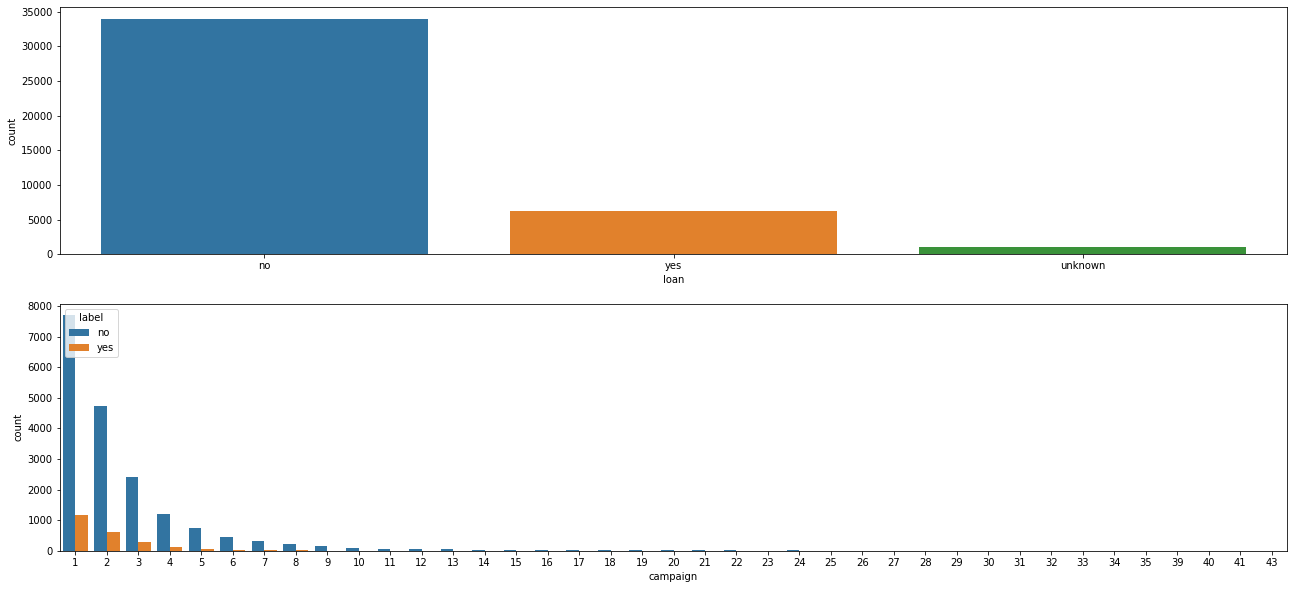

In [37]:
fig, axis = plt.subplots(2 ,1, figsize=(22, 10))
sns.countplot(x='loan', data=df, ax=axis[0])
p = sns.countplot(x='campaign', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('label')

print("campaign' values summary:")
df.loc[df['y'] != 'unknown']['campaign'].value_counts()

### pdays
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
Since '999' means that client was not previously contacted I've decided to add additional boolean column to indicate this situation - in order to emphasise it for the model

In [38]:
df['contacted'] = (df['pdays'] != 999).astype(int)

In [39]:
# We can observe that 999 is most common
print('pdays values summary:')
df.loc[df['y'] != 'unknown']['pdays'].value_counts()

pdays values summary:


999    20043
6        216
3        214
4         54
9         35
12        30
2         30
7         26
13        21
10        21
5         21
11        16
14        13
1         10
8         10
15         9
0          7
18         6
17         6
16         6
22         2
21         1
25         1
26         1
Name: pdays, dtype: int64

### previous
previous: number of contacts performed before this campaign and for this client (numeric)

'previous' values summary:
0    17983
1     2276
2      386
3      111
4       32
5        7
6        3
7        1
Name: previous, dtype: int64


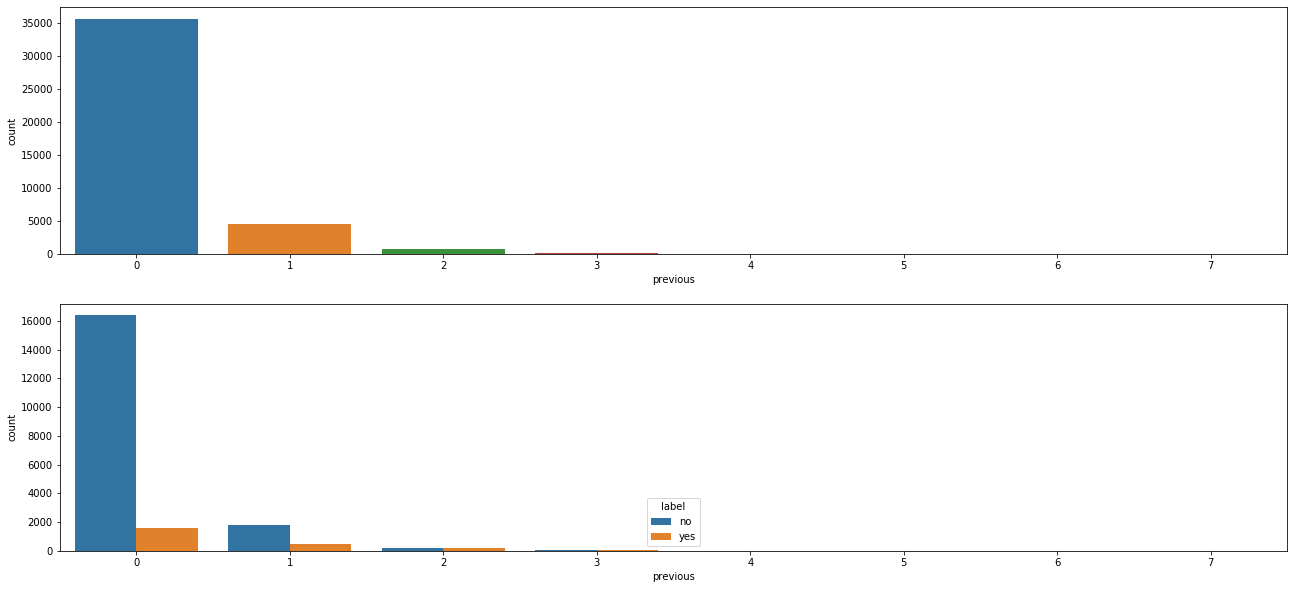

In [40]:
fig, axis = plt.subplots(2, 1, figsize=(22, 10))
sns.countplot(x='previous', data=df, ax=axis[0])
p = sns.countplot(x='previous', hue='y', data=df.loc[df['y'] != 'unknown'], ax=axis[1])
p.get_legend().set_title('label')

print("'previous' values summary:")
print(df.loc[df['y'] != 'unknown']['previous'].value_counts())

In [42]:
# One Hot Encoding
for feature in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'contact_year', 'contact_month', 'contact_day_of_week']:
    df = pd.concat([df, pd.get_dummies(df[feature], prefix=feature)], axis=1)
    df = df.drop([feature], axis=1)

df = df[df.columns.drop(list(df.filter(regex='unknown')))]
df.head()

,id,campaign,pdays,previous,y,age,contacted,job_admin.,job_blue-collar,job_entrepreneur,...,contact_month_8,contact_month_9,contact_month_10,contact_month_11,contact_month_12,contact_day_of_week_0,contact_day_of_week_1,contact_day_of_week_2,contact_day_of_week_3,contact_day_of_week_4
0,1,1,999,0,no,58,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,999,0,unknown,59,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,999,0,no,39,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,999,0,unknown,42,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,1,999,0,unknown,58,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Preparing dataset for model's API

In [43]:
# Map labels to integers
df['y'] = df['y'].map({'yes': 1, 'no': 0, 'unknown': -1})

# Split known from unknown
X = df.loc[df['y'] != -1].drop(['y'], axis=1)
y = df.loc[df['y'] != -1, 'y']
X_unlabeled = df.loc[df['y'] == -1].drop(['y'], axis=1) # Data for Kaggle prediction

# Create train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Tools and settings

In [44]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')
# plt.rcParams['font.size']=18
    
def evaluate_model(model, name=None):
    from sklearn.model_selection import cross_val_score
    if name:
        print(name)
    print('\ncross-validation scores (roc_auc) train dataset:\n', cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc'), "\n")
    train_probs = model.predict_proba(X_train)[:, 1]
    test_probs = model.predict_proba(X_test)[:, 1]
    
    # Train set performance - used to check whether model visibly overfits
    train_results = {}
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    # Test set performance
    results = {}
    results['roc'] = roc_auc_score(y_test, test_probs)
    
    for metric in ['roc']:
         print(f'''{metric.capitalize()} 
         Train: {round(train_results[metric], 2)}
         Test: {round(results[metric], 2)}
         ''')
    

def save_models(models, dir_path):
    from sklearn.externals import joblib
    import os
    
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    for name, model in models.items():
        joblib.dump(model, f'{dir_path}/{name}.pkl')
    
    
def present_models(models):
    ''' models: dictionary['name'] -> model '''
    train_results = {}
    test_results = {}
    for name, model in sorted(models.items()):
        train_probs = model.predict_proba(X_train)[:, 1]
        test_probs = model.predict_proba(X_test)[:, 1]
        train_results[name] = roc_auc_score(y_train, train_probs)
        test_results[name] = roc_auc_score(y_test, test_probs)
    
    models_df = pd.DataFrame.from_dict(train_results, orient='index', columns=['train results roc']
                                      ).join(pd.DataFrame.from_dict(test_results, orient='index', columns=['test results roc']))
    print(models_df.to_string())
    return models_df


def get_best_model(models):
    best_result = 0
    for name, model in sorted(models.items()):
        test_probs = model.predict_proba(X_test)[:, 1]
        result = roc_auc_score(y_test, test_probs)
        if result > best_result:
            best_model = model
            best_name = name
            best_result = result
    return best_name, best_model
    
    
def save_predictions(predictions, filename='predictions.csv'):
    tmp1 = df.loc[df['y'] == -1, 'id']
    tmp1.reset_index(drop=True, inplace=True)
    tmp2 = pd.Series(predictions)
    tmp2.reset_index(drop=True, inplace=True)
    res = pd.concat([tmp1, tmp2], axis=1)
    res.columns = ['id', 'y']
    res.head()
    res.to_csv(filename, index=False)


def make_predictions_for_submission(model, filename='predictions.csv'):
    save_predictions(model.predict_proba(X_unlabeled)[:, 1], filename)
    

def save_pdf(model, name):
    from IPython.display import Image  
    import pydotplus
    # Visualize Tree
    dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=X.columns,
                                filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data) 
    Image(graph.create_png())
    graph.write_pdf(name)

In [45]:
# Common
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

random_search_params = {
    'n_iter': 1000,
    'scoring': 'roc_auc',
    'n_jobs': -1,
    'cv': 3,
    'verbose': 2,
    'random_state': 42
}

grid_search_params = {
    'cv': 3,
    'n_jobs': -1,
    'verbose': 2
}

all_models = {}

# Models

### RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

rfc_baseline = RandomForestClassifier(max_depth=10, n_estimators=500)
rfc_baseline.fit(X_train, y_train)
all_models['rfc_baseline'] = rfc_baseline
evaluate_model(rfc_baseline)


cross-validation scores (roc_auc) train dataset:
 [0.79691631 0.78724388 0.80073021] 

Roc 
         Train: 0.89
         Test: 0.79
         


### AdaBoostClassifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_baseline = AdaBoostClassifier(learning_rate=0.1, n_estimators=256, random_state=42)
adaboost_baseline.fit(X_train, y_train)
evaluate_model(adaboost_baseline)
all_models['adaboost_baseline'] = adaboost_baseline


cross-validation scores (roc_auc) train dataset:
 [0.7923945  0.77672624 0.79711587] 

Roc 
         Train: 0.8
         Test: 0.79
         


### GradientBoostingClassifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_baseline = GradientBoostingClassifier()
gbc_baseline.fit(X_train, y_train)

evaluate_model(gbc_baseline)
all_models['gbc_baseline'] = gbc_baseline


cross-validation scores (roc_auc) train dataset:
 [0.79394756 0.78363849 0.8046693 ] 

Roc 
         Train: 0.82
         Test: 0.79
         


In [49]:
fixed_params = {
    'random_state': 42,
    'max_features': 'sqrt'
}

param_grid = {
    'n_estimators': [50, 100, 200, 300, 500], 
    'learning_rate': [0.01, 0.05, 0.075, 0.1],
    'max_depth': [3, 5, 7, 10, 13]
}
    
gbc_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(**fixed_params),
                               param_grid=param_grid,
                               **grid_search_params)
gbc_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
       

In [49]:
print(gbc_grid_search.best_params_)
evaluate_model(gbc_grid_search.best_estimator_)
all_models['gbc_grid_search'] = gbc_grid_search

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

cross-validation scores (roc_auc) train dataset:
 [0.79296845 0.78841993 0.80640496] 

Roc 
         Train: 0.83
         Test: 0.79
         


### XGBClassifier

In [53]:
from xgboost import XGBClassifier

xgb_clf_baseline = XGBClassifier()
xgb_clf_baseline.fit(X_train, y_train)

print(xgb_clf_baseline.get_params)
evaluate_model(xgb_clf_baseline)
all_models['xgb_clf_baseline'] = xgb_clf_baseline

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

cross-validation scores (roc_auc) train dataset:
 [0.79907692 0.79014886 0.80965676] 

Roc 
         Train: 0.83
         Test: 0.79
         


In [54]:
fixed_params = {
    'objective': 'binary:logistic',
}

param_distributions = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [80, 100, 150],
    'min_child_weight': [1, 2],
    'gamma': [0, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'max_depth': [4, 5, 6]
}

xgb_random_search_params = random_search_params.copy()
xgb_random_search_params['n_iter'] = 300

xgb_random_search = RandomizedSearchCV(estimator=XGBClassifier(**fixed_params),
                                       param_distributions=param_distributions,
                                       **xgb_random_search_params
                                      )
xgb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 18.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [56]:
all_models['xgb_random_search'] = xgb_random_search.best_estimator_
evaluate_model(xgb_random_search.best_estimator_)
print(xgb_random_search.best_params_)


cross-validation scores (roc_auc) train dataset:
 [0.79884364 0.79352586 0.81024301] 

Roc 
         Train: 0.85
         Test: 0.79
         
{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 1.0}


### LightGBM

In [59]:
import lightgbm as lgbm

fixed_params = {    
    'verbose': 2,
    'seed': 42
}

lgbm_baseline = lgbm.LGBMClassifier(**fixed_params)
lgbm_baseline.fit(X_train, y_train)

print(lgbm_baseline)
evaluate_model(lgbm_baseline)
all_models['lgbm_baseline'] = lgbm_baseline

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, seed=42,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0, verbose=2)

cross-validation scores (roc_auc) train dataset:
 [0.78474115 0.78227058 0.79525917] 

Roc 
         Train: 0.93
         Test: 0.78
         


In [60]:
# Note: Parameters for random search have been already "tuned" by me after running multiple trainings
# It allowed me to narrow down the parameters space

param_distributions = {
    'boosting_type': ['gbdt'],
    'num_leaves': [16, 20, 23, 25],
    'max_depth': [-1, 18, 20, 23, 25],
    'learning_rate': [0.001, 0.05, 0.01, 0.03],
    'n_estimators': [256, 300, 350],
    'objective': ['binary'],
    'min_data': [35, 40, 45],
    'feature_fraction': [0.8, 0.85],
    'bagging_fraction': [0.8, 0.85, 0.9],
    'metric': ['auc'],
}

lgbm_random_search_params = random_search_params.copy()
lgbm_random_search_params['n_iter'] = 1200

lgbm_gbdt_random_search = RandomizedSearchCV(estimator=lgbm.LGBMClassifier(**fixed_params),
                                        param_distributions=param_distributions,
                                        **lgbm_random_search_params)
lgbm_gbdt_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 11.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, seed...
                   param_distributions={'bagging_fraction': [0.8, 0.85, 0.9],
                                        'boosti

In [68]:
print(lgbm_gbdt_random_search.best_params_)
evaluate_model(lgbm_gbdt_random_search.best_estimator_)
all_models['lgbm_gbdt_random_search'] = lgbm_gbdt_random_search.best_estimator_

{'objective': 'binary', 'num_leaves': 25, 'n_estimators': 300, 'min_data': 40, 'metric': 'auc', 'max_depth': 25, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'boosting_type': 'gbdt', 'bagging_fraction': 0.9}

cross-validation scores (roc_auc) train dataset:
 [0.79944793 0.7967001  0.80997715] 

Roc 
         Train: 0.85
         Test: 0.79
         


In [70]:
lgbm_gbdt_best = lgbm.LGBMClassifier(**{'objective': 'binary',
                                        'num_leaves': 25,
                                        'n_estimators': 200,
                                        'min_data': 30,
                                        'metric': 'auc',
                                        'max_depth': 30,
                                        'learning_rate': 0.01,
                                        'feature_fraction': 0.85,
                                        'boosting_type': 'gbdt',
                                        'bagging_fraction': 0.85})

lgbm_gbdt_best.fit(X_train, y_train)
evaluate_model(lgbm_gbdt_best)
all_models['lgbm_gbdt_best'] = lgbm_gbdt_best


cross-validation scores (roc_auc) train dataset:
 [0.79868176 0.79385908 0.80745552] 

Roc 
         Train: 0.84
         Test: 0.8
         


In [65]:
# Note: Parameters for random search have been already "tuned" by me after running multiple trainings
# It allowed me to narrow down the parameters space

param_distributions = {
    'boosting_type': ['dart'],
    'num_leaves': [23, 25, 27],
    'max_depth': [-1, 30, 35, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [70, 80, 90, 100],
    'objective': ['binary'],
    'min_data': [35, 40, 45],
    'feature_fraction': [0.8, 0.85],
    'bagging_fraction': [0.8, 0.85],
    'metric': ['auc'],
}

lgbm_random_search_params = random_search_params.copy()
lgbm_random_search_params['n_iter'] = 1000

lgbm_dart_random_search = RandomizedSearchCV(estimator=lgbm.LGBMClassifier(**fixed_params),
                                        param_distributions=param_distributions,
                                        **lgbm_random_search_params)
lgbm_dart_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, seed...
                   param_distributions={'bagging_fraction': [0.8, 0.85],
                                        'boosting_ty

In [71]:
print(lgbm_dart_random_search.best_params_)
evaluate_model(lgbm_dart_random_search.best_estimator_)
all_models['lgbm_dart_random_search'] = lgbm_dart_random_search.best_estimator_

{'objective': 'binary', 'num_leaves': 23, 'n_estimators': 70, 'min_data': 40, 'metric': 'auc', 'max_depth': 30, 'learning_rate': 0.1, 'feature_fraction': 0.85, 'boosting_type': 'dart', 'bagging_fraction': 0.85}

cross-validation scores (roc_auc) train dataset:
 [0.79818666 0.79702478 0.80996006] 

Roc 
         Train: 0.83
         Test: 0.79
         


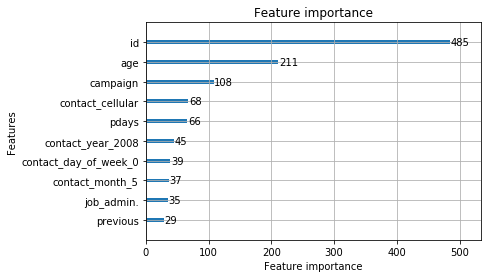

In [72]:
lgbm.plot_importance(lgbm_dart_random_search.best_estimator_, max_num_features=10)

In [74]:
lgbm_dart_fixed = lgbm.LGBMClassifier(**{'bagging_fraction': 0.8,
                                         'boosting_type': 'dart',
                                         'feature_fraction': 0.85,
                                         'learning_rate': 0.05,
                                         'max_depth': 8,
                                         'metric': 'auc',
                                         'min_data': 45,
                                         'n_estimators': 70,
                                         'num_leaves': 23,
                                         'objective': 'binary'})
lgbm_dart_fixed.fit(X_train, y_train)
evaluate_model(lgbm_dart_fixed)


cross-validation scores (roc_auc) train dataset:
 [0.79773953 0.79282365 0.80768504] 

Roc 
         Train: 0.83
         Test: 0.8
         


### CatBoostClassifier

In [75]:
from catboost import CatBoostClassifier

catboost_baseline = CatBoostClassifier(iterations=1000,
                           eval_metric='AUC', 
                           learning_rate=0.001,
                           depth=10,
                           verbose=100000,
                          )
catboost_baseline.fit(X_train, y_train)
evaluate_model(catboost_baseline)
all_models['catboost_baseline'] = catboost_baseline

0:	total: 123ms	remaining: 2m 2s
999:	total: 35.2s	remaining: 0us
0:	total: 42.7ms	remaining: 42.7s
999:	total: 32.8s	remaining: 0us
0:	total: 39.8ms	remaining: 39.8s
999:	total: 31.1s	remaining: 0us
0:	total: 38.5ms	remaining: 38.5s
999:	total: 31.6s	remaining: 0us

cross-validation scores (roc_auc) train dataset:
 [0.7910473  0.78256709 0.80177259] 

Roc 
         Train: 0.81
         Test: 0.79
         


# Summary

In [76]:
present_models(all_models)

                         train results roc  test results roc
adaboost_baseline                 0.797727          0.789922
catboost_baseline                 0.811083          0.790643
gbc_baseline                      0.816157          0.794319
lgbm_baseline                     0.927207          0.781336
lgbm_dart_random_search           0.832503          0.793250
lgbm_gbdt_best                    0.835923          0.795277
lgbm_gbdt_random_search           0.850376          0.794748
rfc_baseline                      0.891220          0.786137
xgb_clf_baseline                  0.828133          0.794756
xgb_random_search                 0.851069          0.794617


,train results roc,test results roc
adaboost_baseline,0.797727,0.789922
catboost_baseline,0.811083,0.790643
gbc_baseline,0.816157,0.794319
lgbm_baseline,0.927207,0.781336
lgbm_dart_random_search,0.832503,0.793250
lgbm_gbdt_best,0.835923,0.795277
lgbm_gbdt_random_search,0.850376,0.794748
rfc_baseline,0.891220,0.786137
xgb_clf_baseline,0.828133,0.794756
xgb_random_search,0.851069,0.794617


What else I've tried, although I've decided not to go down this path

Models:
- Neural Network MLP
- AdaBoostClassifier
- GradientBoostingClassifier
- CatBoostClassifier

Feature Engineering:
- Mapping age into age range e.g. less_than_20, less_than_30 etc...
- Mapping pdays into range e.g. less_than_5, less_than_10 etc..
- Mapping campaign into range e.g. less_than_2, less_than_5 etc...
- Other combinations

In [77]:
save_models(all_models, './models_simpler')

/usr/local/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [78]:
name, model = get_best_model(all_models)
print(name, '\n', model)
model.fit(X, y)
make_predictions_for_submission(model, filename=name+'.csv')

copy_all_models = all_models.copy()
copy_all_models.pop(name)
name, model = get_best_model(copy_all_models)
print(name, '\n', model)
model.fit(X, y)
make_predictions_for_submission(model, filename=name+'.csv')

lgbm_gbdt_best 
 LGBMClassifier(bagging_fraction=0.85, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.85,
               importance_type='split', learning_rate=0.01, max_depth=30,
               metric='auc', min_child_samples=20, min_child_weight=0.001,
               min_data=30, min_split_gain=0.0, n_estimators=200, n_jobs=-1,
               num_leaves=25, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
xgb_clf_baseline 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_w